In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# 1 Data Load

In [69]:
# Dataset Link: https://data.mendeley.com/datasets/3pcn4zf54h/1

df = pd.read_csv('dataset.csv', parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010-02-09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010-02-10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010-02-11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010-02-15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010-02-16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
3109,2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
3110,2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0
3111,2022-09-08,2588.250000,2598.000000,2571.000000,2585.399902,2585.399902,3256840,60.656396,2670.549281,2531.929304,...,2590.446181,2581.505598,1019.856298,-58.627907,-54.556808,-0.02058910806,36,80,8.940583,0


In [70]:
df = df.sort_values('Date').reset_index(drop=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010-02-09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010-02-10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010-02-11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010-02-15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010-02-16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
3109,2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
3110,2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0
3111,2022-09-08,2588.250000,2598.000000,2571.000000,2585.399902,2585.399902,3256840,60.656396,2670.549281,2531.929304,...,2590.446181,2581.505598,1019.856298,-58.627907,-54.556808,-0.02058910806,36,80,8.940583,0


In [71]:
df = df[['Date', 'Close']].rename(columns={'Close': 'close'})
df.set_index('Date', inplace=True)
df.head()

,close
Date,
2010-02-09,491.961700
2010-02-10,487.924957
2010-02-11,502.808868
2010-02-15,500.258057
2010-02-16,504.096680


# 2 Data Visulization

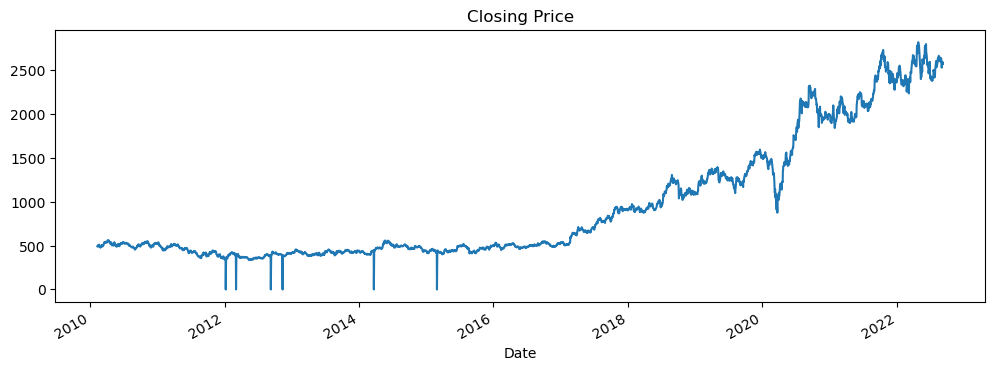

In [72]:
# Plot the closing prices
df['close'].plot(title='Closing Price', figsize=(12,4))
plt.show()

# 3 Data Preprocessing

In [73]:
## Check for missing values
df.isnull().sum()

close    0
dtype: int64

In [74]:
# Check if 'close' has any negative values
has_negative_in_col1 = (df['close'] < 0).any()
has_negative_in_col1

False

## 3.1 Decomposition

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

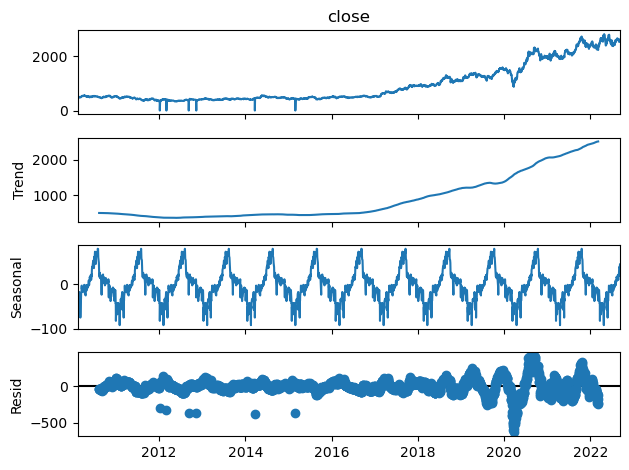

In [76]:
decomp = seasonal_decompose(df['close'], model='additive', period=252)
decomp.plot()
plt.show()

# 4 Stationarity Check

In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
def adf_test(series):
    res = adfuller(series.dropna())
    print('ADF Statistic:', res[0])
    print('p-value:', res[1])
    for k,v in res[4].items():
        print('Critial Values:')
        print(k, v)

adf_test(df['close'])

ADF Statistic: 0.6464651620094171
p-value: 0.9887066433562735
Critial Values:
1% -3.43245576226643
Critial Values:
5% -2.8624703946061567
Critial Values:
10% -2.567265271491845


### As the "p-value" is greater, so, the Null Hypotheses is True; Not Stationary

## 4.1 Transforming into Stationary

In [79]:
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


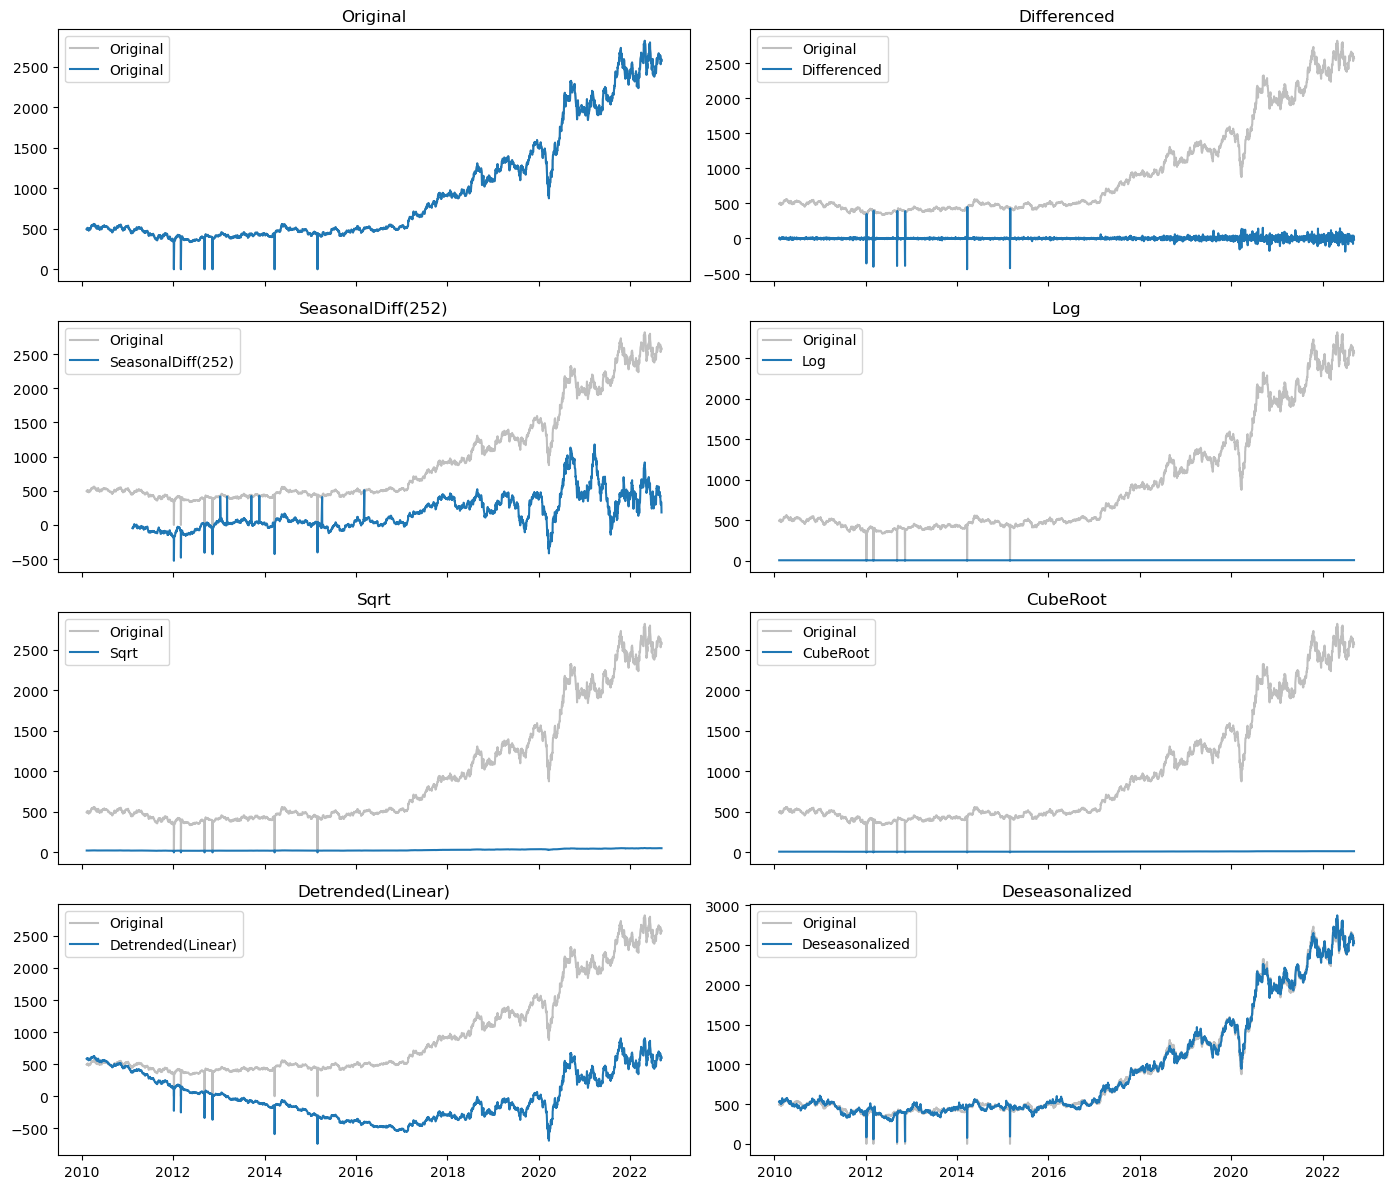

In [80]:
series = df['close'].copy()
period = 252  # trading days per year for daily stock data

# 1️ Differencing
diff_series = series.diff()

# 2️ Seasonal Differencing
seasonal_diff_series = series.diff(period)

# 3️ Log Transformation
log_series = np.log(series)
# Handle -inf if any 0 values exist
log_series.replace(-np.inf, np.nan, inplace=True)

# 4️ Square Root / Cube Root
sqrt_series = np.sqrt(series)
cuberoot_series = np.cbrt(series)

# 5️ Box–Cox Transformation (needs positive values)
boxcox_series = None
boxcox_lambda = None
if (series > 0).all():
    boxcox_series, boxcox_lambda = boxcox(series)
    boxcox_series = pd.Series(boxcox_series, index=series.index)

# 6️ Detrending (Linear)
t = np.arange(len(series)).reshape(-1, 1)
model = LinearRegression().fit(t, series.values)
trend = model.predict(t)
detrended_series = series.values - trend
detrended_series = pd.Series(detrended_series, index=series.index)

# 7️ Deseasonalizing (Seasonal Decomposition)
decomp = seasonal_decompose(series, model='additive', period=period)
deseasonalized_series = series - decomp.seasonal

# Combine into dictionary
transformations = {
    'Original': series,
    'Differenced': diff_series,
    f'SeasonalDiff({period})': seasonal_diff_series,
    'Log': log_series,
    'Sqrt': sqrt_series,
    'CubeRoot': cuberoot_series,
}

if boxcox_series is not None:
    transformations[f'BoxCox(λ={boxcox_lambda:.2f})'] = boxcox_series

transformations['Detrended(Linear)'] = detrended_series
transformations['Deseasonalized'] = deseasonalized_series

# Plot
n = len(transformations)
rows = int(np.ceil(n / 2))
fig, axes = plt.subplots(rows, 2, figsize=(14, 3*rows), sharex=True)
axes = axes.flatten()

for i, (name, ts) in enumerate(transformations.items()):
    axes[i].plot(series.index, series, label='Original', alpha=0.5, color='gray')
    axes[i].plot(ts.index, ts, label=name)
    axes[i].set_title(name)
    axes[i].legend()

for ax in axes[n:]:
    fig.delaxes(ax)  # remove empty subplots

plt.tight_layout()
plt.show()

## 4.3 ADF Test

In [81]:
def adf_test_results(series_dict):
    results = []
    for name, ts in series_dict.items():
        ts = ts.dropna()
        try:
            adf_result = adfuller(ts)
            stat, pvalue, usedlag, nobs, crit_vals, icbest = adf_result
            decision = 'Stationary' if pvalue < 0.05 else 'Non-Stationary'
            results.append({
                'Transformation': name,
                'ADF Statistic': round(stat, 4),
                'p-value': round(pvalue, 5),
                '1% CV': round(crit_vals['1%'], 4),
                '5% CV': round(crit_vals['5%'], 4),
                '10% CV': round(crit_vals['10%'], 4),
                'Decision': decision
            })
        except Exception as e:
            results.append({
                'Transformation': name,
                'ADF Statistic': np.nan,
                'p-value': np.nan,
                '1% CV': np.nan,
                '5% CV': np.nan,
                '10% CV': np.nan,
                'Decision': f'⚠️ Error: {str(e)}'
            })
    return pd.DataFrame(results).set_index('Transformation')

# Run ADF on all transformations
adf_table = adf_test_results(transformations)

# Sort by p-value (ascending)
adf_table = adf_table.sort_values('p-value', ascending=True)
adf_table

,ADF Statistic,p-value,1% CV,5% CV,10% CV,Decision
Transformation,,,,,,
Differenced,-32.4044,0.00000,-3.4325,-2.8625,-2.5673,Stationary
SeasonalDiff(252),-3.1926,0.02042,-3.4326,-2.8626,-2.5673,Stationary
Detrended(Linear),-1.6555,0.45417,-3.4325,-2.8625,-2.5673,Non-Stationary
CubeRoot,0.2333,0.97407,-3.4325,-2.8625,-2.5673,Non-Stationary
Log,0.3767,0.98060,-3.4325,-2.8625,-2.5673,Non-Stationary
Sqrt,0.4453,0.98311,-3.4325,-2.8625,-2.5673,Non-Stationary
Deseasonalized,0.6311,0.98836,-3.4325,-2.8625,-2.5673,Non-Stationary
Original,0.6465,0.98871,-3.4325,-2.8625,-2.5673,Non-Stationary


## 4.4 ACF & PACF Test

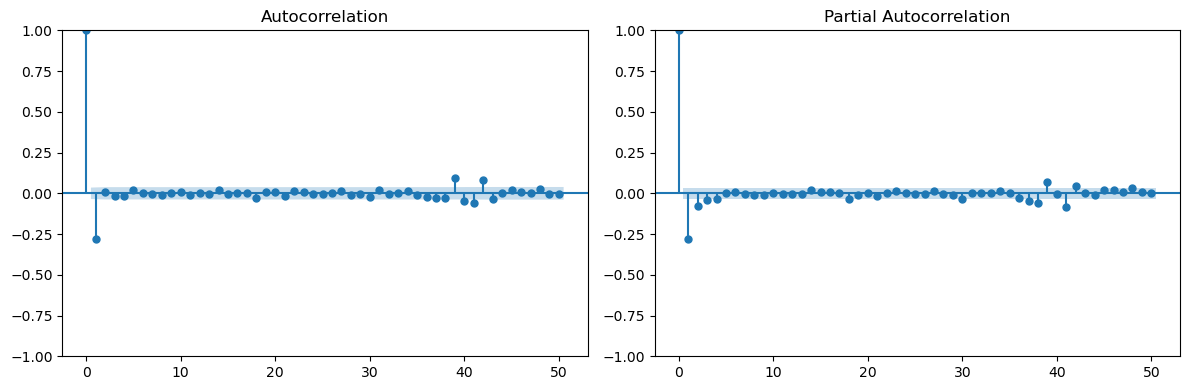

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_acf(df['close'].diff().dropna(), lags=50, ax=plt.gca())
plt.subplot(1,2,2)
plot_pacf(df['close'].diff().dropna(), lags=50, ax=plt.gca(), method='ywm')
plt.tight_layout()
plt.show()

# 5 Modeling (Without Rolling Window)

## 5.0 Train-Test Split

Training data from 2010-02-09 00:00:00 to 2020-03-09 00:00:00
Testing data from 2020-03-09 00:00:00 to 2022-09-09 00:00:00

Training set size: 2491
Testing set size: 623


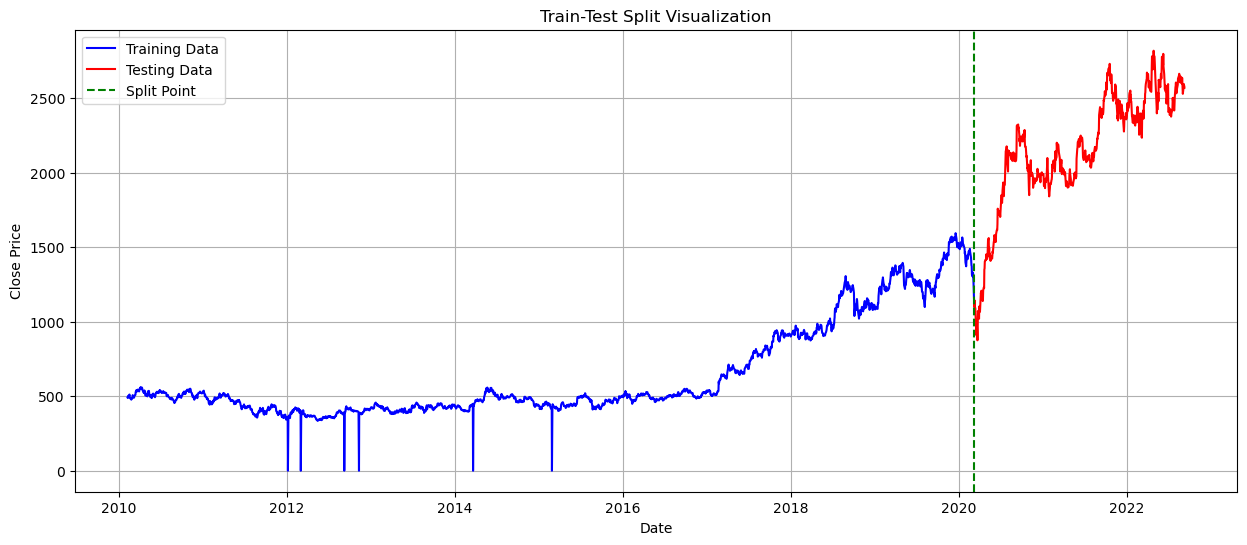

In [83]:
# Define the split point (we'll use 80% for training)
split_index = int(len(df) * 0.8)
split_date = df.index[split_index]

# Split the data
train_data = df[:split_date]
test_data = df[split_date:]

print(f"Training data from {train_data.index[0]} to {train_data.index[-1]}")
print(f"Testing data from {test_data.index[0]} to {test_data.index[-1]}")
print(f"\nTraining set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

# Visualize the split
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['close'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['close'], label='Testing Data', color='red')
plt.axvline(x=split_date, color='green', linestyle='--', label='Split Point')
plt.title('Train-Test Split Visualization')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## 5.1 ARIMA

### 5.1.1 Gridsearch for best ARIMA

In [84]:
import itertools
import statsmodels.api as sm

In [85]:
def arima_grid_search(series, p_values, d_values, q_values, criterion='aic'):
    """
    Grid search over p,d,q for ARIMA.
    series: pandas Series (non-transformed, ARIMA will handle differencing)
    criterion: 'aic' or 'bic'
    """
    best_score, best_cfg = float("inf"), None
    results = []
    for p, d, q in itertools.product(p_values, d_values, q_values):
        order = (p,d,q)
        try:
            model = sm.tsa.ARIMA(series, order=order)
            res = model.fit()
            score = res.aic if criterion == 'aic' else res.bic
            results.append((order, res.aic, res.bic))
            if score < best_score:
                best_score, best_cfg = score, order
        except:
            continue
    result_df = pd.DataFrame(results, columns=['order','AIC','BIC']).sort_values('AIC')
    return best_cfg, result_df


In [86]:
# Grid search on training data only
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)

best_order, search_table = arima_grid_search(train_data['close'], p, d, q, criterion='aic')
print(f"Best ARIMA order: {best_order}")
search_table.head(10)

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored

Best ARIMA order: (0, 1, 1)


c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,order,AIC,BIC
5,"(0, 1, 1)",23471.319618,23482.959694
10,"(0, 2, 2)",23472.901243,23490.360152
17,"(1, 1, 1)",23473.259734,23490.719848
6,"(0, 1, 2)",23473.263164,23490.723278
29,"(2, 1, 1)",23474.640161,23497.920313
7,"(0, 1, 3)",23474.703050,23497.983202
22,"(1, 2, 2)",23474.828092,23498.106638
11,"(0, 2, 3)",23474.832494,23498.111039
18,"(1, 1, 2)",23475.315158,23498.595309
34,"(2, 2, 2)",23476.154032,23505.252213


### 5.1.2 ARIMA Model Fitting

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

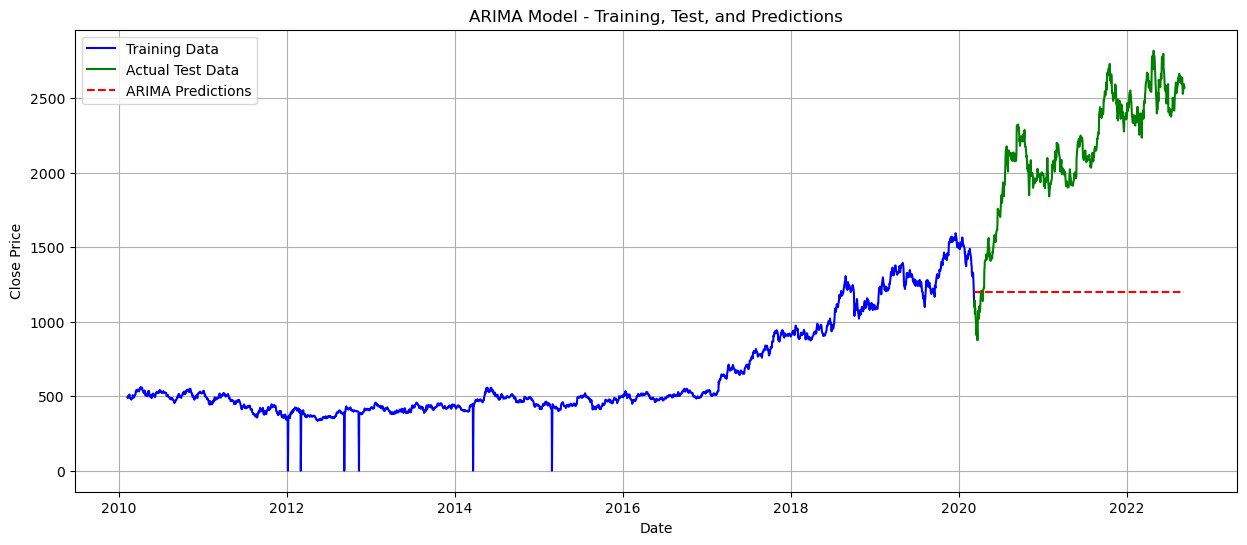


ARIMA Test Set Performance Metrics:
Mean Absolute Error (MAE): 968.75
Root Mean Square Error (RMSE): 1033.37
Mean Absolute Percentage Error (MAPE): 42.91%


In [87]:
# Fit ARIMA model on training data
model_arima = sm.tsa.ARIMA(train_data['close'], order=best_order)
res_arima = model_arima.fit()

# Make predictions on test set
arima_forecast = res_arima.forecast(steps=len(test_data))
arima_forecast.index = test_data.index

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['close'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['close'], label='Actual Test Data', color='green')
plt.plot(test_data.index, arima_forecast, label='ARIMA Predictions', color='red', linestyle='--')
plt.title('ARIMA Model - Training, Test, and Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate error metrics for test set
mae_arima = mean_absolute_error(test_data['close'], arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test_data['close'], arima_forecast))
mape_arima = np.mean(np.abs((test_data['close'] - arima_forecast) / test_data['close'])) * 100

print("\nARIMA Test Set Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_arima:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse_arima:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_arima:.2f}%")

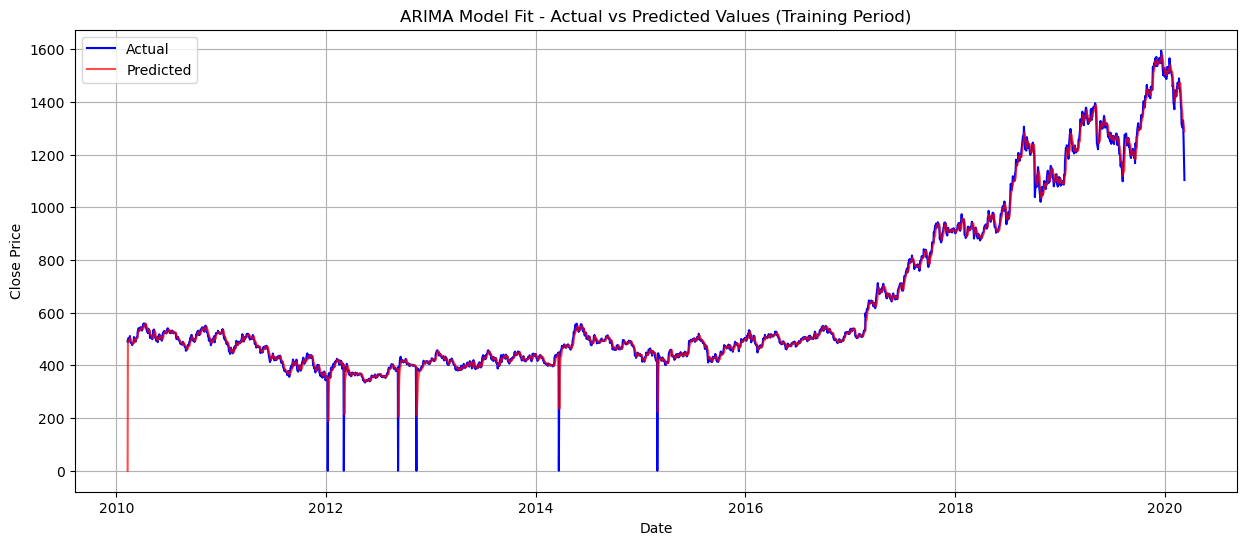


Model Performance Metrics (Training Period):
Mean Absolute Error (MAE): 11.66
Root Mean Square Error (RMSE): 28.67
Mean Absolute Percentage Error (MAPE): inf%


In [88]:
# Get the fitted/predicted values from the ARIMA model for training period
fitted_values = res_arima.fittedvalues
residuals = res_arima.resid

# Create the plot for training period
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['close'], label='Actual', color='blue')
plt.plot(train_data.index, fitted_values, label='Predicted', color='red', alpha=0.7)

plt.title('ARIMA Model Fit - Actual vs Predicted Values (Training Period)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate error metrics for training period
mae_train = mean_absolute_error(train_data['close'], fitted_values)
rmse_train = np.sqrt(mean_squared_error(train_data['close'], fitted_values))
mape_train = np.mean(np.abs((train_data['close'] - fitted_values) / train_data['close'])) * 100

print("\nModel Performance Metrics (Training Period):")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%")

### 5.1.3

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


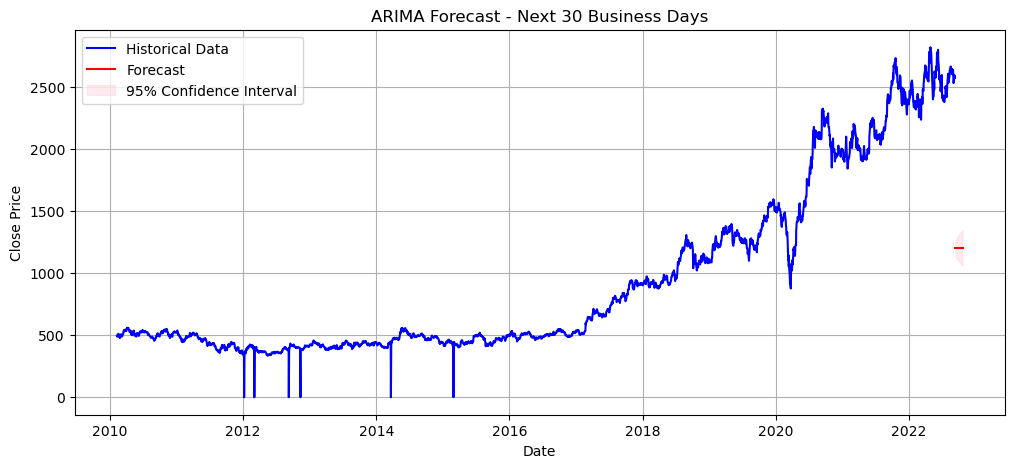


Forecast Values:
            Forecast  Lower CI  Upper CI
2022-09-12   1202.08   1149.29   1254.86
2022-09-13   1202.08   1143.79   1260.37
2022-09-14   1202.08   1138.76   1265.39
2022-09-15   1202.08   1134.11   1270.05
2022-09-16   1202.08   1129.75   1274.41
2022-09-19   1202.08   1125.64   1278.52
2022-09-20   1202.08   1121.74   1282.41
2022-09-21   1202.08   1118.03   1286.13
2022-09-22   1202.08   1114.47   1289.69
2022-09-23   1202.08   1111.04   1293.11
2022-09-26   1202.08   1107.75   1296.41
2022-09-27   1202.08   1104.56   1299.60
2022-09-28   1202.08   1101.47   1302.68
2022-09-29   1202.08   1098.48   1305.68
2022-09-30   1202.08   1095.57   1308.59
2022-10-03   1202.08   1092.74   1311.42
2022-10-04   1202.08   1089.98   1314.18
2022-10-05   1202.08   1087.29   1316.87
2022-10-06   1202.08   1084.65   1319.50
2022-10-07   1202.08   1082.08   1322.08
2022-10-10   1202.08   1079.56   1324.60
2022-10-11   1202.08   1077.09   1327.07
2022-10-12   1202.08   1074.67   1329.4

In [89]:
# Future forecasting
forecast_steps = 30
# Create future dates for forecasting
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]  # 'B' for business days

# Get forecast using the trained ARIMA model
forecast_result = res_arima.get_forecast(steps=forecast_steps)
mean_forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Assign the proper dates to forecast results
mean_forecast.index = forecast_dates
conf_int.index = forecast_dates

# Plotting
plt.figure(figsize=(12,5))
plt.plot(df.index, df['close'], label='Historical Data', color='blue')
plt.plot(forecast_dates, mean_forecast, label='Forecast', color='red')
plt.fill_between(forecast_dates, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3,
                 label='95% Confidence Interval')

plt.title(f"ARIMA Forecast - Next {forecast_steps} Business Days")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecast values with dates
print("\nForecast Values:")
forecast_df = pd.DataFrame({
    'Forecast': mean_forecast,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
}).round(2)
print(forecast_df)

## 5.2 Prophet Model

20:24:55 - cmdstanpy - INFO - Chain [1] start processing
20:24:55 - cmdstanpy - INFO - Chain [1] done processing
20:24:55 - cmdstanpy - INFO - Chain [1] done processing


20:24:55 - cmdstanpy - INFO - Chain [1] start processing
20:24:55 - cmdstanpy - INFO - Chain [1] done processing
20:24:55 - cmdstanpy - INFO - Chain [1] done processing


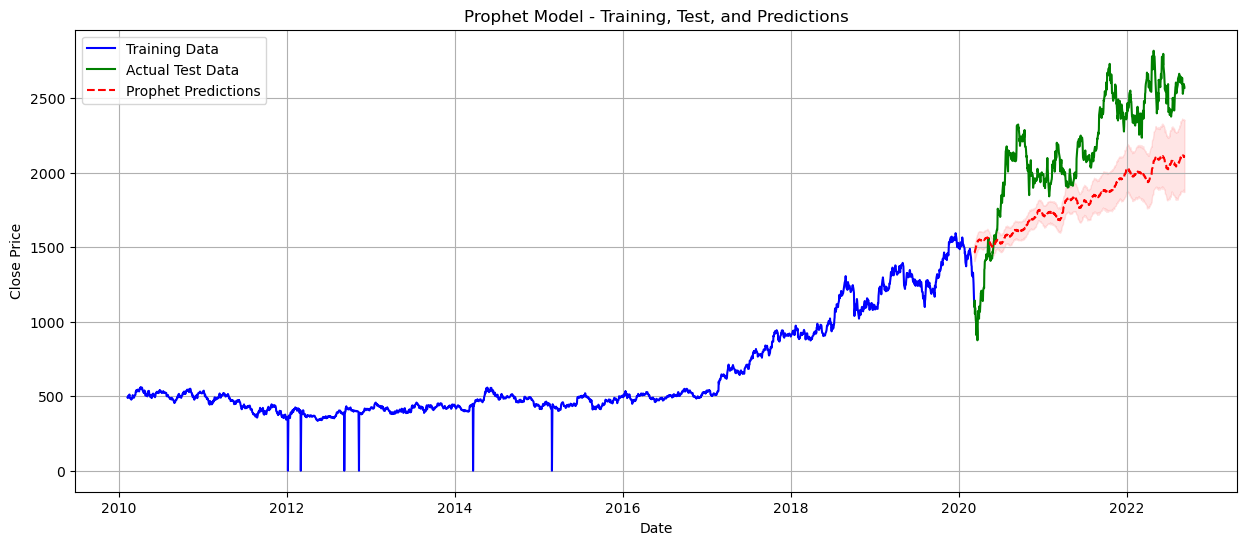


Prophet Test Set Performance Metrics:
Mean Absolute Error (MAE): 398.72
Root Mean Square Error (RMSE): 437.04
Mean Absolute Percentage Error (MAPE): 18.36%


In [90]:
# Prepare training data for Prophet
train_prophet = train_data.reset_index().rename(columns={'Date': 'ds', 'close': 'y'})

# Create and fit the Prophet model on training data
prophet_model = Prophet(
    changepoint_prior_scale=0.05,  # Flexibility of the trend
    yearly_seasonality=True,       # Yearly seasonal component
    weekly_seasonality=True,       # Weekly seasonal component
    daily_seasonality=False,       # Daily seasonal component
    seasonality_mode='multiplicative'  # Multiplicative seasonality
)
prophet_model.fit(train_prophet)

# Create future dates for the test period
future_dates = prophet_model.make_future_dataframe(periods=len(test_data), freq='B')
forecast = prophet_model.predict(future_dates)

# Extract predictions for the test period
test_predictions = forecast.tail(len(test_data))

# Plot results
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['close'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['close'], label='Actual Test Data', color='green')
plt.plot(test_data.index, test_predictions['yhat'], label='Prophet Predictions', color='red', linestyle='--')
plt.fill_between(test_data.index, 
                 test_predictions['yhat_lower'], 
                 test_predictions['yhat_upper'],
                 color='red', alpha=0.1)
plt.title('Prophet Model - Training, Test, and Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate error metrics for test set
mae_prophet = mean_absolute_error(test_data['close'], test_predictions['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(test_data['close'], test_predictions['yhat']))
mape_prophet = np.mean(np.abs((test_data['close'].values - test_predictions['yhat'].values) / test_data['close'].values)) * 100

print("\nProphet Test Set Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_prophet:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse_prophet:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_prophet:.2f}%")

In [61]:
# Future forecasting with Prophet
future_dates = prophet_model.make_future_dataframe(periods=30, freq='B')
future_forecast = prophet_model.predict(future_dates)

# Get the forecast values for the next 30 days
future_predictions = future_forecast.tail(30)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_predictions.columns = ['Date', 'Forecast', 'Lower CI', 'Upper CI']

# Plot future forecast
plt.figure(figsize=(12,5))
plt.plot(df.index, df['close'], label='Historical Data', color='blue')
plt.plot(pd.to_datetime(future_predictions['Date']), 
         future_predictions['Forecast'], 
         label='Prophet Forecast', 
         color='red')
plt.fill_between(pd.to_datetime(future_predictions['Date']),
                 future_predictions['Lower CI'],
                 future_predictions['Upper CI'],
                 color='pink', alpha=0.3,
                 label='95% Confidence Interval')

plt.title("Prophet Model - Future Forecast")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("\nProphet Future Forecast Values:")
print(future_predictions.round(2))


Prophet Model Performance Metrics:
Mean Absolute Error (MAE): 56.13
Root Mean Square Error (RMSE): 91.24
Mean Absolute Percentage Error (MAPE): inf%

Prophet Forecast Values for Next 30 Days:
           Date  Forecast  Lower CI  Upper CI
3113 2022-09-12   2887.18   2762.06   3005.95
3114 2022-09-13   2907.42   2795.53   3017.91
3115 2022-09-14   2919.31   2802.25   3033.28
3116 2022-09-15   2930.55   2816.84   3049.09
3117 2022-09-16   2938.04   2820.62   3057.10
3118 2022-09-19   2973.11   2846.23   3093.42
3119 2022-09-20   2992.77   2883.47   3112.08
3120 2022-09-21   3003.37   2889.19   3127.77
3121 2022-09-22   3012.64   2884.56   3120.63
3122 2022-09-23   3017.51   2904.03   3130.41
3123 2022-09-26   3041.59   2928.90   3167.70
3124 2022-09-27   3056.79   2938.99   3179.04
3125 2022-09-28   3062.61   2950.08   3177.65
3126 2022-09-29   3066.91   2956.97   3187.40
3127 2022-09-30   3066.69   2948.76   3180.36
3128 2022-10-03   3075.73   2960.73   3191.35
3129 2022-10-04   3086.26

# 6 Model Comparison on Test Set (Without Rolling Window)

Model Performance Comparison on Test Set:
     Metric    ARIMA  Prophet
0       MAE   968.75   398.72
1      RMSE  1033.37   437.04
2  MAPE (%)    42.91    18.36


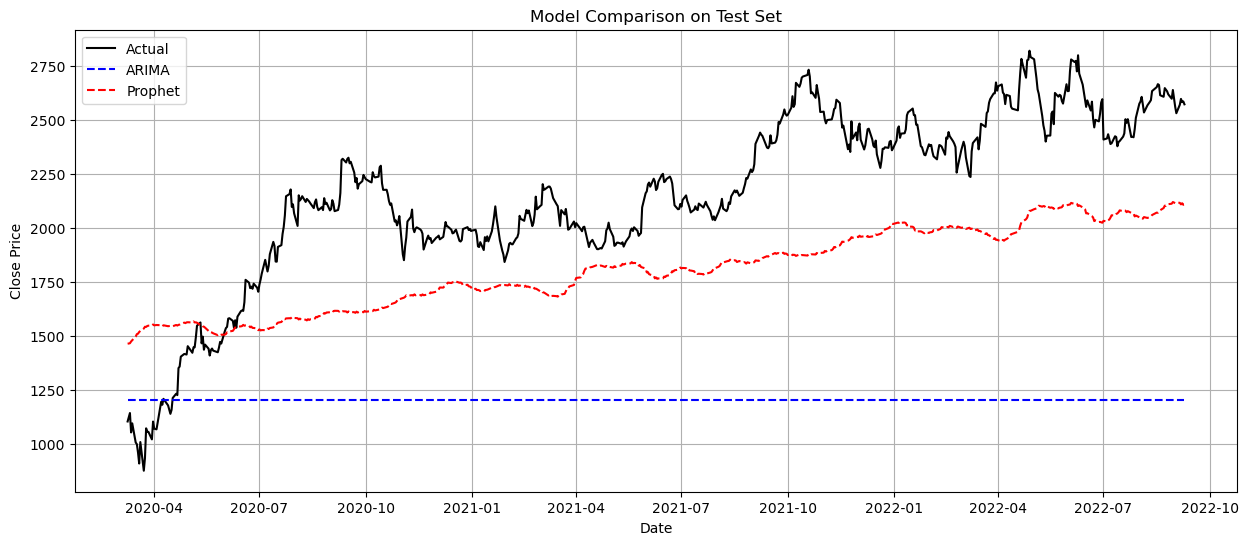

In [91]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)'],
    'ARIMA': [mae_arima, rmse_arima, mape_arima],
    'Prophet': [mae_prophet, rmse_prophet, mape_prophet]
})

print("Model Performance Comparison on Test Set:")
print(comparison_df.round(2))

# Visualize the comparison
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data['close'], label='Actual', color='black')
plt.plot(test_data.index, arima_forecast, label='ARIMA', color='blue', linestyle='--')
plt.plot(test_data.index, test_predictions['yhat'], label='Prophet', color='red', linestyle='--')
plt.title('Model Comparison on Test Set')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# 7 Modeling (With Rooling Window Evaluation)

In [ ]:
# Define rolling window parameters
window_size = 252  # 1 year of trading days
prediction_size = 30  # 30 days forecast
step_size = 21  # Move forward by 21 days (approximately 1 month)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

# Initialize lists to store metrics
arima_metrics = []
prophet_metrics = []
dates = []

# Get the total number of windows
total_windows = (len(df) - window_size - prediction_size) // step_size
print(f"Total number of rolling windows: {total_windows}")

# Progress tracking
from tqdm.notebook import tqdm
for i in tqdm(range(total_windows)):
    # Define the window
    start_idx = i * step_size
    train_end_idx = start_idx + window_size
    test_end_idx = train_end_idx + prediction_size
    
    # Get the data for this window
    train_data = df.iloc[start_idx:train_end_idx]
    test_data = df.iloc[train_end_idx:test_end_idx]
    
    # Store the date for this window
    dates.append(train_data.index[-1])
    
    try:
        # ARIMA
        model_arima = sm.tsa.ARIMA(train_data['close'], order=best_order)
        res_arima = model_arima.fit()
        arima_pred = res_arima.forecast(steps=len(test_data))
        mae_a, rmse_a, mape_a = calculate_metrics(test_data['close'], arima_pred)
        arima_metrics.append([mae_a, rmse_a, mape_a])
        
        # Prophet
        train_prophet = train_data.reset_index().rename(columns={'Date': 'ds', 'close': 'y'})
        prophet_model = Prophet(
            changepoint_prior_scale=0.05,
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative'
        )
        prophet_model.fit(train_prophet)
        future_dates = prophet_model.make_future_dataframe(periods=prediction_size, freq='B')
        forecast = prophet_model.predict(future_dates)
        prophet_pred = forecast.tail(prediction_size)['yhat'].values
        mae_p, rmse_p, mape_p = calculate_metrics(test_data['close'], prophet_pred)
        prophet_metrics.append([mae_p, rmse_p, mape_p])
        
    except Exception as e:
        print(f"Error in window {i}: {str(e)}")
        continue

# Convert metrics to arrays
arima_metrics = np.array(arima_metrics)
prophet_metrics = np.array(prophet_metrics)

# Calculate average metrics
print("\nAverage Rolling Window Metrics:")
print("\nARIMA:")
print(f"MAE: {np.mean(arima_metrics[:, 0]):.2f} (±{np.std(arima_metrics[:, 0]):.2f})")
print(f"RMSE: {np.mean(arima_metrics[:, 1]):.2f} (±{np.std(arima_metrics[:, 1]):.2f})")
print(f"MAPE: {np.mean(arima_metrics[:, 2]):.2f}% (±{np.std(arima_metrics[:, 2]):.2f}%)")

print("\nProphet:")
print(f"MAE: {np.mean(prophet_metrics[:, 0]):.2f} (±{np.std(prophet_metrics[:, 0]):.2f})")
print(f"RMSE: {np.mean(prophet_metrics[:, 1]):.2f} (±{np.std(prophet_metrics[:, 1]):.2f})")
print(f"MAPE: {np.mean(prophet_metrics[:, 2]):.2f}% (±{np.std(prophet_metrics[:, 2]):.2f}%)")